In [954]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [955]:
itemcat=pd.read_csv("item_categories.csv")
shop=pd.read_csv("shops.csv")
train=pd.read_csv('sales_train.csv')
test=pd.read_csv("test.csv")

In [956]:
item=pd.read_csv("items.csv")

In [957]:
def sales(dataframe):
    df=dataframe
    print('About datatypes of columns and memory usage:')
    df.info()
    print('Shape of data frame:')
    print(df.shape)
    for col in df.columns:
        print("Unique number of values in ")
        print(col)
        print(df.loc[:,col].nunique())
    print("number of null values present in each column")
    print(df.isnull().sum())
    print(df.head(3))

In [958]:
sales(train)

About datatypes of columns and memory usage:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
Shape of data frame:
(2935849, 6)
Unique number of values in 
date
1034
Unique number of values in 
date_block_num
34
Unique number of values in 
shop_id
60
Unique number of values in 
item_id
21807
Unique number of values in 
item_price
19993
Unique number of values in 
item_cnt_day
198
number of null values present in each column
date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.

In [959]:
sales(test)

About datatypes of columns and memory usage:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB
Shape of data frame:
(214200, 3)
Unique number of values in 
ID
214200
Unique number of values in 
shop_id
42
Unique number of values in 
item_id
5100
number of null values present in each column
ID         0
shop_id    0
item_id    0
dtype: int64
   ID  shop_id  item_id
0   0        5     5037
1   1        5     5320
2   2        5     5233


In [960]:
sales(shop)

About datatypes of columns and memory usage:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
Shape of data frame:
(60, 2)
Unique number of values in 
shop_name
60
Unique number of values in 
shop_id
60
number of null values present in each column
shop_name    0
shop_id      0
dtype: int64
                       shop_name  shop_id
0  !Якутск Орджоникидзе, 56 фран        0
1  !Якутск ТЦ "Центральный" фран        1
2               Адыгея ТЦ "Мега"        2


In [961]:
print("train")
print(train.head())
Id = test['ID']
print("test")
print(test.head())

train
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0
test
   ID  shop_id  item_id
0   0        5     5037
1   1        5     5320
2   2        5     5233
3   3        5     5232
4   4        5     5268


In [962]:
train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [963]:
pd.DataFrame(train.iloc[:, 4].sort_values(ascending=False)).head(10)

,item_price
1163158,307980.0
885138,59200.0
1488135,50999.0
2327159,49782.0
2931380,42990.0
2917760,42990.0
2910156,42990.0
2885692,42990.0
1006638,42000.0
2910155,41990.0


C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


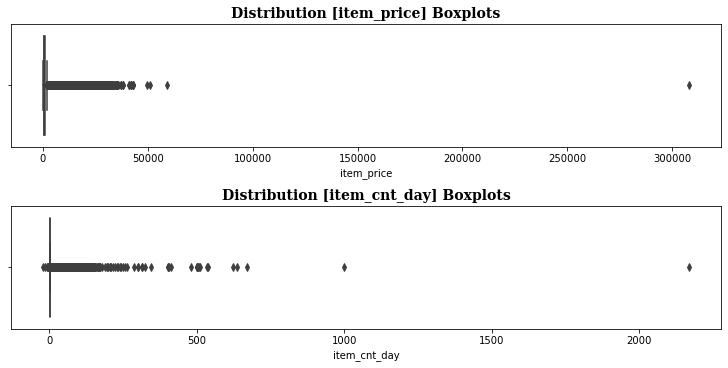

In [964]:
fig, axes = plt.subplots(2,1, figsize=(10,5), constrained_layout=True)

sns.boxplot(train['item_price'], ax=axes[0])
axes[0].set_title("Distribution [item_price] Boxplots", fontweight="bold", fontfamily='serif', fontsize=14)
axes[0].patch.set_alpha(0)

sns.boxplot(train['item_cnt_day'], ax=axes[1])
axes[1].set_title("Distribution [item_cnt_day] Boxplots", fontweight="bold", fontfamily='serif', fontsize=14)
axes[1].patch.set_alpha(0)

plt.show()

In [965]:
def outlier(df):
    df = df.drop(df[df['item_price']>=50000].index)
    df = df.drop(df[df['item_price']<0].index)
    df = df.drop(df[df['item_cnt_day']>=550].index)
    df = df.drop(df[df['item_cnt_day']<0].index)
    print(df.shape)
    return df

In [966]:
train = outlier(train)

(2928484, 6)


In [967]:
train['revenues'] = train['item_price'] * train['item_cnt_day']
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenues
0,02.01.2013,0,59,22154,999.00,1.0,999.00
1,03.01.2013,0,25,2552,899.00,1.0,899.00
3,06.01.2013,0,25,2554,1709.05,1.0,1709.05
4,15.01.2013,0,25,2555,1099.00,1.0,1099.00
5,10.01.2013,0,25,2564,349.00,1.0,349.00


In [968]:
group = train.groupby(['date_block_num', 'shop_id', 'item_id']).agg(
    {'item_cnt_day': ['sum']})
group.columns = ['item_cnt_month']
group.reset_index(inplace=True)
train = pd.merge(train, group, on=['shop_id', 'item_id', 'date_block_num'], how='left')
train['item_cnt_month'] = (train['item_cnt_month']
                        .fillna(0)
                        .clip(0, 100)
                        .astype(np.float16))
                          

In [969]:
train.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenues,item_cnt_month
2928479,10.10.2015,33,25,7409,299.0,1.0,299.0,3.0
2928480,09.10.2015,33,25,7460,299.0,1.0,299.0,3.0
2928481,14.10.2015,33,25,7459,349.0,1.0,349.0,1.0
2928482,22.10.2015,33,25,7440,299.0,1.0,299.0,1.0
2928483,03.10.2015,33,25,7460,299.0,1.0,299.0,3.0


In [970]:
train[(train['shop_id']==31) & (train['date_block_num']==0) & (train['item_id']==4906)].head()


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenues,item_cnt_month
59988,03.01.2013,0,31,4906,1794.0,2.0,3588.0,11.0
59989,02.01.2013,0,31,4906,1789.0,1.0,1789.0,11.0
60011,12.01.2013,0,31,4906,1799.0,1.0,1799.0,11.0
60013,14.01.2013,0,31,4906,1799.0,1.0,1799.0,11.0
60014,19.01.2013,0,31,4906,1799.0,1.0,1799.0,11.0


In [971]:
train['item_price_log'] = np.log1p(train["item_price"])
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenues,item_cnt_month,item_price_log
0,02.01.2013,0,59,22154,999.00,1.0,999.00,1.0,6.907755
1,03.01.2013,0,25,2552,899.00,1.0,899.00,1.0,6.802395
2,06.01.2013,0,25,2554,1709.05,1.0,1709.05,1.0,7.444278
3,15.01.2013,0,25,2555,1099.00,1.0,1099.00,1.0,7.003065
4,10.01.2013,0,25,2564,349.00,1.0,349.00,1.0,5.857933


In [972]:
train = train.drop(['date',"revenues","item_price"], axis=1)

In [973]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [974]:
test.head(5)

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [975]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

import itertools

In [976]:
series = pd.DataFrame(train[(train['shop_id']==29) & (train['item_id']==5822)]['item_cnt_month']).reset_index().drop('index',axis=1)
series.tail()

,item_cnt_month
270,15.0
271,15.0
272,15.0
273,15.0
274,15.0


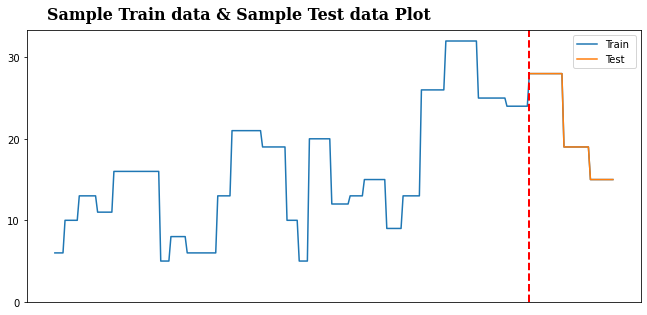

In [977]:
from sklearn.model_selection import train_test_split
trainx, testx= train_test_split(series, test_size=0.15, shuffle=False)

fig, ax = plt.subplots(1,1, figsize=(11,5))
plt.plot(sample_series, label="Train ")
plt.plot(testx, label="Test ")
plt.axvline(x=len(trainx), color='r',linestyle='--', linewidth=2)

ax.set_yticks(np.arange(0,31,10))
ax.set_xticks([])

ax.legend()
ax.patch.set_alpha(0)

fig.text(0.15,0.91,"Sample Train data & Sample Test data Plot", fontweight="bold", fontfamily='serif', fontsize=16)
plt.show()

In [978]:
print("Sample Train data size : {}".format(trainx.shape))
print("Sample Test data size : {}".format(testx.shape))

Sample Train data size : (233, 1)
Sample Test data size : (42, 1)


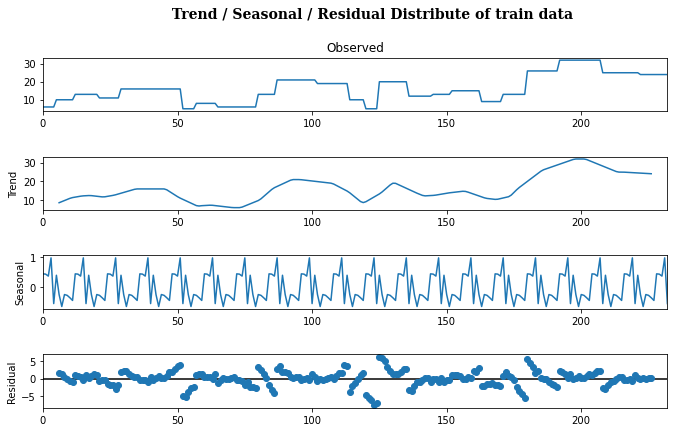

In [979]:
res = sm.tsa.seasonal_decompose(trainx.values, period=12, model='addidtive')
fig = res.plot()
fig.set_size_inches(10,6)
fig.text(0.28,1," Trend / Seasonal / Residual Distribute of train data", fontweight="bold", fontfamily='serif', fontsize=14)
plt.show()

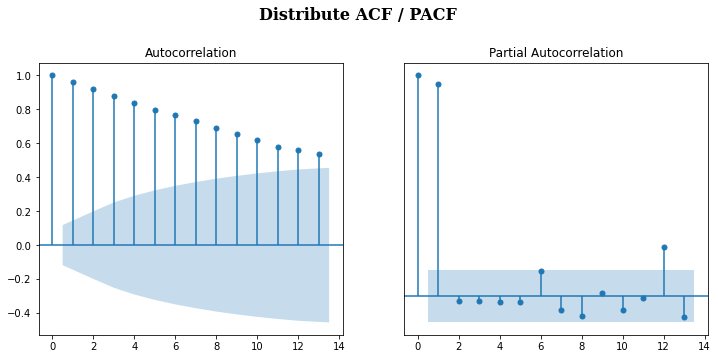

In [980]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

plot_acf(series,lags=13, ax=axes[0])
plot_pacf(series,lags=13, ax=axes[1])
axes[1].set_yticks([])

fig.text(0.38,1,"Distribute ACF / PACF", fontweight="bold", fontfamily='serif', fontsize=16)
plt.show()

In [981]:
diff_trainx = trainx.copy()
diff_trainx = diff_trainx.diff()
diff_trainx = diff_trainx.dropna()
print("=== Basic Data ===")
print(diff_trainx[:5],"\n\n")

print("=== Diff Data ===")
print(diff_trainx[:5])

=== Basic Data ===
   item_cnt_month
1             0.0
2             0.0
3             0.0
4             0.0
5             4.0 


=== Diff Data ===
   item_cnt_month
1             0.0
2             0.0
3             0.0
4             0.0
5             4.0


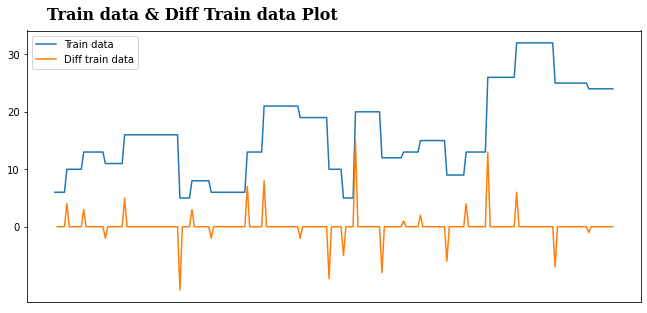

In [982]:
fig, ax = plt.subplots(1,1, figsize=(11,5))
ax.plot(trainx, label="Train data")
ax.plot(diff_trainx, label="Diff train data")

ax.set_yticks(np.arange(0,31,10))
ax.set_xticks([])

ax.legend()
ax.patch.set_alpha(0)

fig.text(0.15,0.91,"Train data & Diff Train data Plot", fontweight="bold", fontfamily='serif', fontsize=16)
plt.show()

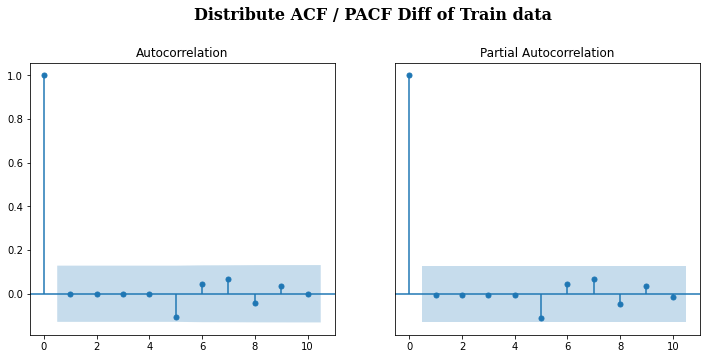

In [983]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

plot_acf(diff_trainx,lags=10, ax=axes[0])
plot_pacf(diff_trainx,lags=10, ax=axes[1])
axes[1].set_yticks([])

fig.text(0.315,1,"Distribute ACF / PACF Diff of Train data", fontweight="bold", fontfamily='serif', fontsize=16)
plt.show()

In [984]:
p = range(0,5)
d = range(1,2)
q = range(0,5)
pdq = list(itertools.product(p,d,q))
pdq = pdq[1:]

print("Using parameters : {}".format(pdq))

Using parameters : [(0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 1, 4), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 1, 4), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3), (2, 1, 4), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 1, 3), (3, 1, 4), (4, 1, 0), (4, 1, 1), (4, 1, 2), (4, 1, 3), (4, 1, 4)]


In [985]:
aic = []
for i in pdq:
    model = ARIMA(trainx.values, order=(i))
    model_fit = model.fit()
    print("ARIMA : {} | AIC : {:.3f}".format(i,model_fit.aic))
    aic.append(model_fit.aic)

ARIMA : (0, 1, 1) | AIC : 1004.111
ARIMA : (0, 1, 2) | AIC : 1006.111
ARIMA : (0, 1, 3) | AIC : 1008.111
ARIMA : (0, 1, 4) | AIC : 1010.111
ARIMA : (1, 1, 0) | AIC : 1004.111
ARIMA : (1, 1, 1) | AIC : 1006.111
ARIMA : (1, 1, 2) | AIC : 1008.111
ARIMA : (1, 1, 3) | AIC : 1010.110
ARIMA : (1, 1, 4) | AIC : 1010.494
ARIMA : (2, 1, 0) | AIC : 1006.111
ARIMA : (2, 1, 1) | AIC : 1008.111
ARIMA : (2, 1, 2) | AIC : 1010.111


C:\Users\KIIT\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA : (2, 1, 3) | AIC : 1005.225
ARIMA : (2, 1, 4) | AIC : 1000.564
ARIMA : (3, 1, 0) | AIC : 1008.111
ARIMA : (3, 1, 1) | AIC : 1010.111
ARIMA : (3, 1, 2) | AIC : 1012.111


C:\Users\KIIT\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA : (3, 1, 3) | AIC : 1005.898


C:\Users\KIIT\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA : (3, 1, 4) | AIC : 1002.197
ARIMA : (4, 1, 0) | AIC : 1010.111
ARIMA : (4, 1, 1) | AIC : 1012.111
ARIMA : (4, 1, 2) | AIC : 1014.111
ARIMA : (4, 1, 3) | AIC : 1008.302
ARIMA : (4, 1, 4) | AIC : 1018.111


C:\Users\KIIT\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\KIIT\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\KIIT\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [986]:
best_pdq = [pdq[idx] for idx, num in enumerate(aic) if num==min(aic)][0]
print("Best Parameters : {}".format(best_pdq))

Best Parameters : (2, 1, 4)


In [987]:
arima_model = ARIMA(trainl.values, order=best_pdq).fit()
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  233
Model:                 ARIMA(2, 1, 4)   Log Likelihood                  84.155
Date:                Fri, 16 Jul 2021   AIC                           -154.311
Time:                        00:18:59   BIC                           -130.183
Sample:                             0   HQIC                          -144.580
                                - 233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9443      0.098     -9.678      0.000      -1.136      -0.753
ar.L2         -0.8226      0.120     -6.853      0.000      -1.058      -0.587
ma.L1          1.0053      0.213      4.725      0.000       0.588       1.422
ma.L2          0.9255      0.314      2.948      0.003       0.310       1.541
ma.L3          0.1035      0.284      0.365      0.715      -0.453       0.660
ma.L4          0.1742      0.177      0.983      0.325      -0.173       0.521
sigma2         0.0282      0.001     28.789      0.000       0.026       0.030
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              6142.95
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.44   Skew:                             0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                        28.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [988]:
pred = arima_model.forecast(len(testl))
print("Prdiction values : {}".format(pred))

Prdiction values : [3.19007285 3.17977345 3.18135597 3.18893371 3.18047624 3.18222888
 3.18753128 3.18108247 3.18281011 3.18648373 3.18159353 3.18318927
 3.18570527 3.18201671 3.18343005 3.18512978 3.18236207 3.18357735
 3.18470658 3.18264052 3.18366254 3.18439707 3.18286271 3.18370735
 3.18417198 3.1830384  3.18372661 3.18400926 3.18317621 3.18373034
 3.18389237 3.18328352 3.18372516 3.18380898 3.18336652 3.18371538
 3.18374994 3.18343032 3.18370371 3.18370848 3.18347907 3.18369177]


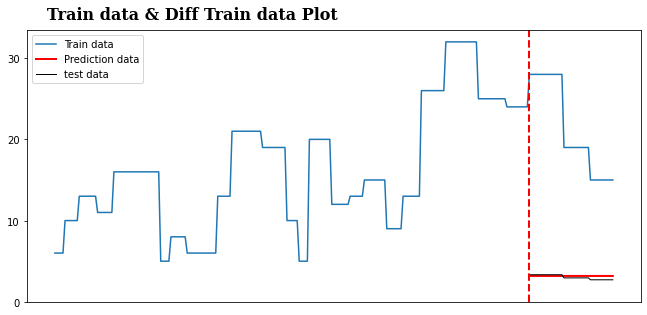

In [989]:
fig, ax = plt.subplots(1,1, figsize=(11,5))

ax.plot(series, label="Train data")
ax.plot(np.arange(0,len(pred)) + len(trainl),pred, label="Prediction data",color='r', linewidth=2)
ax.plot(testl, label="test data",color='k', linewidth=1)
        
ax.axvline(x=len(trainl), color='r',linestyle='--', linewidth=2)

ax.set_yticks(np.arange(0,31,10))
ax.set_xticks([])

ax.legend()
ax.patch.set_alpha(0)

fig.text(0.15,0.91,"Train data & Diff Train data Plot", fontweight="bold", fontfamily='serif', fontsize=16)
plt.show()

In [990]:
train.head()

,date_block_num,shop_id,item_id,item_cnt_day,item_cnt_month,item_price_log
0,0,59,22154,1.0,1.0,6.907755
1,0,25,2552,1.0,1.0,6.802395
2,0,25,2554,1.0,1.0,7.444278
3,0,25,2555,1.0,1.0,7.003065
4,0,25,2564,1.0,1.0,5.857933


In [991]:
x = train.drop('item_cnt_month', axis=1)
y = train['item_cnt_month']

In [992]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.metrics import mean_squared_error
from sklearn.utils import resample
from sklearn.pipeline import Pipeline

In [993]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [994]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2342787, 5)
(2342787,)
(585697, 5)
(585697,)


In [995]:
lr = LinearRegression()
lr.fit(x_train, y_train)
print('Train set mse:', mean_squared_error(y_train, lr.predict(x_train)))
print('Test set mse:', mean_squared_error(y_test, lr.predict(x_test)))
print('Train set score:', lr.score(x_train,y_train))

Train set mse: 138.5859935304171
Test set mse: 134.82194935159671
Train set score: 0.15875550856244758


In [996]:
grad_boost = GradientBoostingRegressor(learning_rate = 0.2, n_estimators = 65, random_state = 42)
grad_boost.fit(x_train, y_train)
print('Train set mse:', mean_squared_error(y_train, grad_boost.predict(x_train)))
print('Test set mse:', mean_squared_error(y_test, grad_boost.predict(x_test)))
print('Train set score:', grad_boost.score(x_train,y_train))

Train set mse: 61.213793987457784
Test set mse: 60.82023360753617
Train set score: 0.6284201189448511
